<a href="https://colab.research.google.com/github/SeoyoungOhMe/skt-fly-ai-challenger-class/blob/master/02_knn_bin_citrus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-최근접이웃 (이진분류)
---
- citrus 데이터셋

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings

warnings.filterwarnings('ignore')

### 1.데이터 준비

In [ ]:
!wget https://raw.githubusercontent.com/devdio/datasets/main/citrus.csv

--2023-12-26 08:23:37--  https://raw.githubusercontent.com/devdio/datasets/main/citrus.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 308294 (301K) [text/plain]
Saving to: ‘citrus.csv.2’

citrus.csv.2        100%[===================>] 301.07K  --.-KB/s    in 0.04s   

2023-12-26 08:23:37 (7.03 MB/s) - ‘citrus.csv.2’ saved [308294/308294]



In [ ]:
citrus = pd.read_csv('citrus.csv')

type(citrus)

pandas.core.frame.DataFrame

In [ ]:
# 데이터의 Shape
citrus.shape

(10000, 6)

In [ ]:
df = citrus.copy()
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [ ]:
df.describe()

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [ ]:
# 결측치(Missing Value)
df.isna().sum(axis=0)

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

In [ ]:
df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [ ]:
# 타깃값의 개수 확인
df['name'].value_counts()

orange        5000
grapefruit    5000
Name: name, dtype: int64

### 2.테스트 분리
- 8:2 분리

In [ ]:
# 데이터 섞기
df = df.sample(frac=1) # 무작위로 100% 섞음
df.head(10)

,name,diameter,weight,red,green,blue
5975,grapefruit,10.43,180.65,139,77,10
1032,orange,7.47,137.73,158,76,13
5310,grapefruit,9.61,167.65,152,60,27
2680,orange,8.59,154.15,149,79,10
5867,grapefruit,10.33,179.11,159,89,16
9222,grapefruit,12.73,216.84,159,71,20
9800,grapefruit,13.62,230.76,148,68,20
8872,grapefruit,12.43,211.67,164,78,2
8228,grapefruit,11.92,204.73,153,87,11
5602,grapefruit,10.02,174.59,142,79,2


In [ ]:
# 타깃값 분리(입력, 출력 분리)
y = df['name']
y.head()

5975    grapefruit
1032        orange
5310    grapefruit
2680        orange
5867    grapefruit
Name: name, dtype: object

In [ ]:
df.columns

Index(['name', 'diameter', 'weight', 'red', 'green', 'blue'], dtype='object')

In [ ]:
X = df[['diameter', 'weight', 'red', 'green', 'blue']]
X.head()

,diameter,weight,red,green,blue
5975,10.43,180.65,139,77,10
1032,7.47,137.73,158,76,13
5310,9.61,167.65,152,60,27
2680,8.59,154.15,149,79,10
5867,10.33,179.11,159,89,16


In [ ]:
# 확인

X.shape, y.shape

((10000, 5), (10000,))

In [ ]:
# 테스트 데이터 분리 (dataframe 슬라이싱 기능 이용)

idx = int(len(X) * 0.8)
idx

8000

In [ ]:
X_train = X.iloc[:idx]
X_test = X.iloc[idx:]

In [ ]:
X_train.shape, X_test.shape

((8000, 5), (2000, 5))

In [ ]:
y_train = y.iloc[:idx]
y_test = y.iloc[idx:]

In [ ]:
y_train.shape, y_test.shape

((8000,), (2000,))

### 3.전처리

#### 스케일링

In [ ]:
X_train.head()

,diameter,weight,red,green,blue
5975,10.43,180.65,139,77,10
1032,7.47,137.73,158,76,13
5310,9.61,167.65,152,60,27
2680,8.59,154.15,149,79,10
5867,10.33,179.11,159,89,16


In [ ]:
X_train.columns

Index(['diameter', 'weight', 'red', 'green', 'blue'], dtype='object')

In [ ]:
# 평균
u_d = X_train['diameter'].mean()
std_d = X_train['diameter'].std()
X_train['diameter'] = (X_train['diameter'] - u_d)/std_d

In [ ]:
u_w = X_train['weight'].mean()
std_w = X_train['weight'].std()
X_train['weight'] = (X_train['weight'] - u_w)/std_w

u_r = X_train['red'].mean()
std_r = X_train['red'].std()
X_train['red'] = (X_train['red'] - u_r)/std_r

u_g = X_train['green'].mean()
std_g = X_train['green'].std()
X_train['green'] = (X_train['green'] - u_g)/std_g

u_b = X_train['blue'].mean()
std_b = X_train['blue'].std()
X_train['blue'] = (X_train['blue'] - u_b)/std_b

In [ ]:
X_train.head()

,diameter,weight,red,green,blue
5975,0.237922,0.196082,-1.426783,0.085943,-0.157714
1032,-1.285052,-1.276186,0.395249,0.001176,0.171859
5310,-0.183983,-0.249852,-0.180129,-1.355097,1.709865
2680,-0.708792,-0.712937,-0.467819,0.255477,-0.157714
5867,0.186470,0.143256,0.491146,1.103148,0.501431


#### 인코딩

In [ ]:
y_train = y_train.map({'grapefruit':0, 'orange':1})
y_train

5975    0
1032    1
5310    0
2680    1
5867    0
       ..
6245    0
4288    1
8785    0
595     1
1359    1
Name: name, Length: 8000, dtype: int64

### 4.학습
- k-nn 알고리즘

In [ ]:
type(X_train), type(y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [ ]:
X_train = X_train.values
y_train = y_train.values
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [ ]:
# 베이스 모델 학습
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf = clf.fit(X_train, y_train)

### 5.평가

- X_test 전처리 (스케일링)
- y_test 인코딩

In [ ]:
X_test.columns

Index(['diameter', 'weight', 'red', 'green', 'blue'], dtype='object')

In [ ]:
X_test['diameter'] = (X_test['diameter'] - u_d)/std_d
X_test['weight'] = (X_test['weight'] - u_w)/std_w
X_test['red'] = (X_test['red'] - u_r)/std_r
X_test['green'] = (X_test['green'] - u_g)/std_g
X_test['blue'] = (X_test['blue'] - u_b)/std_b

X_test.head()

,diameter,weight,red,green,blue
2119,-0.888873,-0.884107,0.491146,0.594545,-1.036575
4191,-0.137677,-0.113328,-0.851405,0.679313,1.600008
1682,-1.032938,-1.031609,-0.180129,1.526983,1.819723
3078,-0.580162,-0.576756,-0.563715,0.594545,0.062001
4581,0.124728,0.126791,0.778835,-0.083591,-1.036575


In [ ]:
y_test = y_test.map({'grapefruit':0, 'orange':1})
y_test

2119    1
4191    1
1682    1
3078    1
4581    1
       ..
7936    0
1851    1
4109    1
4527    1
4344    1
Name: name, Length: 2000, dtype: int64

예측 -> 평가

In [ ]:
X_test = X_test.values
y_test = y_test.values

In [ ]:
# 예측
y_pred = clf.predict(X_test)


In [ ]:
y_pred[:20]

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1])

In [ ]:
y_test[:20]

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1])

In [ ]:
np.sum(y_test == y_pred)/len(y_test)

0.925

In [ ]:
# 오차 행렬
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_pred)
cf


array([[936,  83],
       [ 67, 914]])

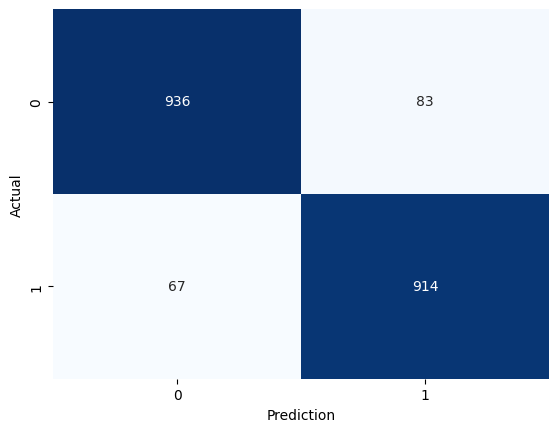

In [ ]:
s = sns.heatmap(cf, annot=True, cmap='Blues', fmt='d', cbar=False)
s.set(xlabel='Prediction', ylabel='Actual')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

acc = accuracy_score(y_test, y_pred)
re = recall_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'accuracy  : {acc}')
print(f'recall  : {re}')
print(f'precision  : {ps}')
print(f'f1  : {f1}')

accuracy  : 0.925
recall  : 0.9317023445463812
precision  : 0.9167502507522568
f1  : 0.9241658240647119


### 6.모델 튜닝

In [ ]:
score = []

for k in range(3, 100):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    score.append(acc)


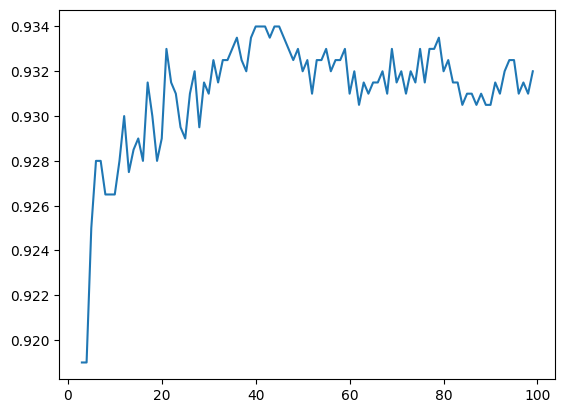

In [ ]:
plt.plot(range(3, 100), score)
plt.show()

In [ ]:
# k가 40일때가 베스트라고 하면,
# 재학습 (베스트 모델...)

best_clf = KNeighborsClassifier(n_neighbors=40)
best_clf = best_clf.fit(X_train, y_train)


### END